In [ ]:
'''
Developer: Paulo Faria 
April/2022, UK

Showing Statistics and Data Information from Driver Deliveries
The mainly requests are:

Excel File Name: Time Sheet.xlsx
Fill: Diary

Data Treatment
 - Delete lines named total
 - Delete coluns A, B, C, G, H, I, P

Data and Statistics
 - sum coluns: total, pick-up, miles, stops, parcels

Dashboards 
 1 - Amount from stops and parcels by month
 2 - Comparative a parallel quantities parcels and stops between months

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_excel('Time Sheet.xlsx')
display(ds)
print(ds.info())


,Semana,Invoice,PG,Data,Turno,Dia Semana,Depósito,Driver,Dias Trab,Valor,Pick-up,Milhas,Stops,Parcelas,Combustivel,Observações
0,NaN,NaN,NaN,2020-06-01,NADA,Segunda-Feira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2020-06-02,NaN,Terça-Feira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,280.8,OK,2020-06-03,12hs,Quarta-Feira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-06-04,12hs,Quinta-Feira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-06-05,NaN,Sexta-Feira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,2022-11-16,11h30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,2022-11-17,11h30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,2022-11-18,11h30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,2022-11-19,11h30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Semana       83 non-null     float64       
 1   Invoice      264 non-null    float64       
 2   PG           79 non-null     object        
 3   Data         906 non-null    datetime64[ns]
 4   Turno        903 non-null    object        
 5   Dia Semana   857 non-null    object        
 6   Depósito     69 non-null     object        
 7   Driver       60 non-null     object        
 8   Dias Trab    201 non-null    object        
 9   Valor        585 non-null    float64       
 10  Pick-up      138 non-null    float64       
 11  Milhas       576 non-null    float64       
 12  Stops        495 non-null    float64       
 13  Parcelas     496 non-null    float64       
 14  Combustivel  343 non-null    float64       
 15  Observações  0 non-null      float64       
dtypes: datet

In [2]:
# Start cleaning data
res = ds.drop(columns=['Turno', 'Semana', 'Invoice', 'PG', 'Depósito', 'Driver', 'Dias Trab', 'Combustivel','Observações'])
#res
display(res)

,Data,Dia Semana,Valor,Pick-up,Milhas,Stops,Parcelas
0,2020-06-01,Segunda-Feira,NaN,NaN,NaN,NaN,NaN
1,2020-06-02,Terça-Feira,NaN,NaN,NaN,NaN,NaN
2,2020-06-03,Quarta-Feira,NaN,NaN,NaN,NaN,NaN
3,2020-06-04,Quinta-Feira,NaN,NaN,NaN,NaN,NaN
4,2020-06-05,Sexta-Feira,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
994,2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN
995,2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN
996,2022-11-18,NaN,NaN,NaN,NaN,NaN,NaN
997,2022-11-19,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Discard TOTAIS lines
res = res.loc[res['Dia Semana'] != 'TOTAIS']
res

,Data,Dia Semana,Valor,Pick-up,Milhas,Stops,Parcelas
0,2020-06-01,Segunda-Feira,NaN,NaN,NaN,NaN,NaN
1,2020-06-02,Terça-Feira,NaN,NaN,NaN,NaN,NaN
2,2020-06-03,Quarta-Feira,NaN,NaN,NaN,NaN,NaN
3,2020-06-04,Quinta-Feira,NaN,NaN,NaN,NaN,NaN
4,2020-06-05,Sexta-Feira,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
994,2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN
995,2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN
996,2022-11-18,NaN,NaN,NaN,NaN,NaN,NaN
997,2022-11-19,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
grp_year_stops = res.groupby(res["Data"].dt.year)["Stops"].sum()
grp_year_stops

Data
2020.0     7337.0
2021.0    38275.0
2022.0    13507.0
Name: Stops, dtype: float64

In [5]:
grp_year_parcels = res.groupby(res["Data"].dt.year)["Parcelas"].sum()
grp_year_parcels

Data
2020.0    11791.0
2021.0    73298.0
2022.0    23570.0
Name: Parcelas, dtype: float64

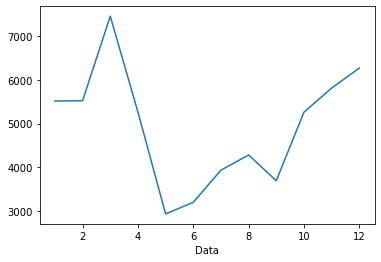

In [6]:
# Sum of Qtt STOPS delivered - month
grp_year_stops = res.groupby(res["Data"].dt.month)["Stops"].sum().plot.line()

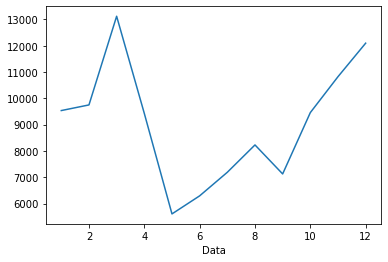

In [7]:
# Sum of Qtt PARCELS delivered - month
grp_year_stops = res.groupby(res["Data"].dt.month)["Parcelas"].sum().plot.line()

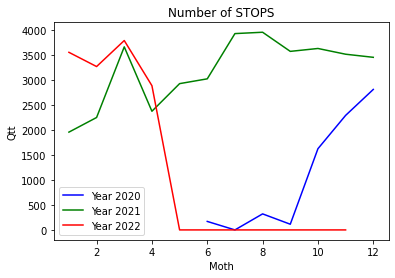

In [8]:
# Dashboard showing SUM of STOPS delivered per month on each year
# Only STOPS of 2020
df_2020 = res[res["Data"].dt.year == 2020]
# Only STOPS of 2021
df_2021 = res[res["Data"].dt.year == 2021]
# Only STOPS of 2022
df_2022 = res[res["Data"].dt.year == 2022]
# Comparative
df_2020.groupby(df_2020["Data"].dt.month)["Stops"].sum().plot(color='blue', label='Year 2020')
df_2021.groupby(df_2021["Data"].dt.month)["Stops"].sum().plot(color='green', label='Year 2021')
df_2022.groupby(df_2022["Data"].dt.month)["Stops"].sum().plot(color='red', label='Year 2022')
#plt.ylim(1000, 4000)
plt.title("Number of STOPS")
plt.xlabel("Moth")
plt.ylabel("Qtt")
plt.legend()
plt.show()

In [9]:
# Sum of stops 2021
df_2021 = res[res["Data"].dt.year == 2021]
df_2021.groupby(df_2021["Data"].dt.month)["Stops"].sum()

Data
1     1958.0
2     2251.0
3     3665.0
4     2376.0
5     2929.0
6     3025.0
7     3931.0
8     3958.0
9     3575.0
10    3633.0
11    3518.0
12    3456.0
Name: Stops, dtype: float64

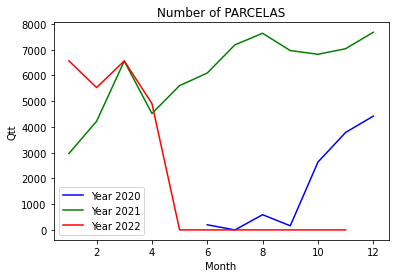

In [10]:
# Dashboard showing SUM of PARCELS delivered per month on each year
# Only PARCELS of 2020
df_2020 = res[res["Data"].dt.year == 2020]
# Only PARCELS of 2021
df_2021 = res[res["Data"].dt.year == 2021]
# Only PARCELS of 2022
df_2022 = res[res["Data"].dt.year == 2022]
# Comparative
df_2020.groupby(df_2020["Data"].dt.month)["Parcelas"].sum().plot(color='blue', label='Year 2020')
df_2021.groupby(df_2021["Data"].dt.month)["Parcelas"].sum().plot(color='green', label='Year 2021')
df_2022.groupby(df_2022["Data"].dt.month)["Parcelas"].sum().plot(color='red', label='Year 2022')
#plt.ylim(1000, 4000)
plt.title("Number of PARCELAS")
plt.xlabel("Month")
plt.ylabel("Qtt")
plt.legend()
plt.show()

In [13]:
# Sum of PARCELS 2021
df_2021 = res[res["Data"].dt.year == 2021]
sumparcels2021 = df_2021.groupby(df_2021["Data"].dt.month)["Parcelas"].sum()
df_2021.columns = ['Data', 'Dia Semana', 'Valor', 'Pick-up', 'Milhas', 'Stops', 'Parcelas 2021']

In [14]:
# Sum of PARCELS 2022

df_2022 = res[res["Data"].dt.year == 2022]
sumparcels2022 = df_2022.groupby(df_2022["Data"].dt.month)["Parcelas"].sum()


In [15]:
sumparcels2021

Data
1     2968.0
2     4220.0
3     6558.0
4     4520.0
5     5606.0
6     6094.0
7     7189.0
8     7638.0
9     6966.0
10    6823.0
11    7038.0
12    7678.0
Name: Parcelas, dtype: float64

In [16]:
sumparcels2022

Data
1     6568.0
2     5530.0
3     6564.0
4     4908.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
Name: Parcelas, dtype: float64

In [17]:
pd.concat([sumparcels2021, sumparcels2022], axis = 1)


,Parcelas,Parcelas
Data,,
1,2968.0,6568.0
2,4220.0,5530.0
3,6558.0,6564.0
4,4520.0,4908.0
5,5606.0,0.0
6,6094.0,0.0
7,7189.0,0.0
8,7638.0,0.0
9,6966.0,0.0
